<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/ml-playground-starter/blob/main/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Gradient Boosting: Theory, Math, and Implementation (XGBoost & LightGBM)

This notebook is a practical guide to **Gradient Boosting** with a focus on the two most popular implementations:

- **XGBoost** (eXtreme Gradient Boosting)
- **LightGBM** (Light Gradient Boosting Machine)

We'll cover:
1. **Intuition** behind boosting
2. **Mathematical formulation** of gradient boosting
3. Key innovations in **XGBoost** and **LightGBM**
4. Hands-on **implementation** for classification & regression
5. **Visualization**: decision boundaries, feature importances, partial dependence
6. Tips: regularization, early stopping, and when to use which

> **Prereqs**: `scikit-learn`, `xgboost`, `lightgbm`, `matplotlib`, `numpy`, `pandas`.


## 1) 🧠 Boosting Intuition
Boosting builds a **strong model** by sequentially adding **weak learners** (typically shallow trees). Each new learner focuses on what previous learners got wrong.

Key ideas:
- Start with a simple model (f<sub>0</sub>(x)).
- At step \(m\), fit a new learner (h<sub>m</sub>(x)) to the **residuals** (errors) or more generally to the **negative gradients** of the loss.
- Update the model: f<sub>m</sub>(x) = f<sub>m−1</sub>(x) + ν · h<sub>m</sub>(x)  
where ν is the learning rate (shrinkage).

This greedy, additive procedure steadily improves the fit while controlling overfitting through shrinkage, small trees, subsampling, and regularization.

## 2) 🧮 Gradient Boosting Math
We optimize a function of the form:
**f\*(x) = arg min<sub>f</sub> Σ<sub>i=1</sub><sup>n</sup> L(y<sub>i</sub>, f(x<sub>i</sub>))**

using a stage-wise, additive model:
**f<sub>m</sub>(x) = f<sub>m−1</sub>(x) + ρ<sub>m</sub> h<sub>m</sub>(x)**

where *h<sub>m</sub>* is a weak learner (e.g., a small CART tree).


At each stage, compute **pseudo-residuals** (negative gradients):

$$
r_{im} = - \left. \frac{\partial L(y_i, f(x_i))}{\partial f(x_i)} \right|_{f = f_{m-1}}
$$

Fit \\( h_m(x) \\) to the pairs \\( \\{ (x_i, r_{im}) \\} \\).



Then perform a line-search (or use a closed form) to choose \( \rho_m \):

$$
\rho_m = \arg\min_{\rho} \sum_{i=1}^n L\!\big(y_i,\; f_{m-1}(x_i) + \rho\, h_m(x_i)\big)
$$




Common losses:
- **Regression:** squared error $L = \tfrac{1}{2}(y - f)^2$ → residuals $r = y - f$




- **Binary classification:** logistic loss $L = \log(1 + e^{-y f})$ with $y \in \{-1, 1\}$

- **Multiclass:** softmax cross-entropy

Regularization mechanisms:
- **Shrinkage** (learning rate $ \nu $)

- **Tree constraints** (depth, leaves, min samples)
- **Subsampling** of rows/columns (stochastic gradient boosting)

## 3) 💡 XGBoost: Second-order boosting with explicit regularization
XGBoost optimizes a **regularized** objective using a **second-order Taylor expansion** of the loss around current predictions.

**Objective at iteration** $t$:

$$
\mathcal{L}^{(t)} = \sum_{i=1}^n l\big(y_i,\; \hat{y}_i^{(t-1)} + g_t(x_i)\big) + \Omega(g_t)
$$

**Approximated via gradients** $g_i$ **and Hessians** $h_i$:

$$
l(y_i, \hat{y}_i + g) \approx l(y_i, \hat{y}_i) + g_i\, g + \tfrac{1}{2} h_i\, g^2
$$

with regularizer:

$$
\Omega(g) = \gamma \cdot T + \tfrac{1}{2}\lambda \sum_j w_j^2
$$

where $T$ is the number of leaves and $w_j$ are leaf weights.

Split gain uses the sums of gradients and Hessians in the left/right child;  
pruning controls complexity via $\gamma$.

**XGBoost** also includes features like column subsampling, missing-value handling, and parallel tree construction.


## 4) ⚡ LightGBM: Speed via histograms & leaf-wise growth
LightGBM accelerates training using:
- **Histogram-based** binning of features (memory-efficient)
- **Leaf-wise (best-first)** tree growth with a **max depth** cap
- **GOSS** (Gradient-based One-Side Sampling): keep large-gradient rows, sample the rest
- **EFB** (Exclusive Feature Bundling): combine mutually exclusive features

Leaf-wise growth often achieves lower loss with fewer trees but can overfit without constraints (set `num_leaves`, `min_data_in_leaf`, and `max_depth`).

## 5) 🔧 Setup (Installs for Colab/Local)
Run the following cell if needed to install dependencies.

In [4]:
!pip -q install -U scikit-learn xgboost lightgbm matplotlib pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 67.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-contrib-python 4.12.0.88 re

## 6) 🧪 Classification Demo: Decision Boundary (2D synthetic)
We compare **XGBoost** and **LightGBM** on a simple 2D dataset to visualize decision boundaries.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:01:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 XGBoost Results
-------------------
Accuracy: 0.967
Confusion Matrix:
 [[146   5]
 [  5 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       151
           1       0.97      0.97      0.97       149

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



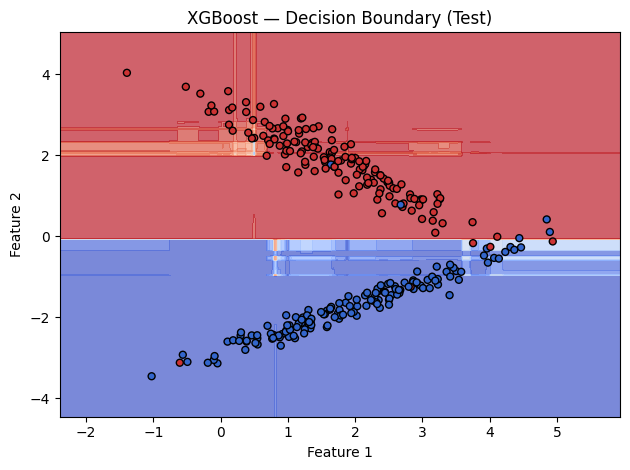

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



🌿 LightGBM Results
-------------------
Accuracy: 0.963
Confusion Matrix:
 [[146   5]
 [  6 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       151
           1       0.97      0.96      0.96       149

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



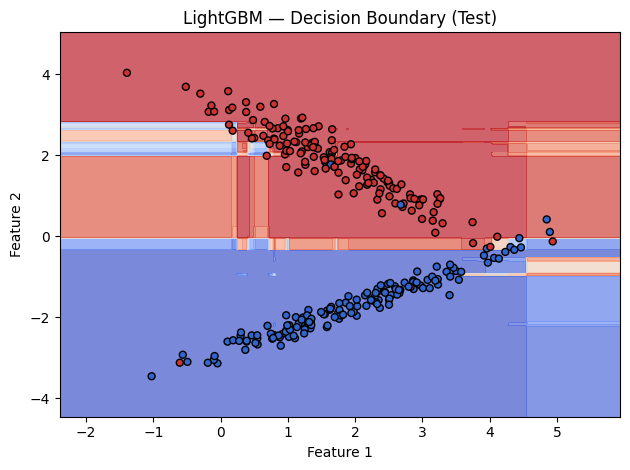

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------------------
# Visualization helper
# ------------------------------------------
def decision_boundary(model, X, y, title="Decision Boundary", proba=False):
    X = np.asarray(X)
    y = np.asarray(y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # Predict class or probability grid
    if proba and hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.7)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cmap_light = ListedColormap([[0.85, 0.92, 1.0], [1.0, 0.88, 0.88]])
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    cmap_bold = ListedColormap([[0.2, 0.4, 0.8], [0.8, 0.2, 0.2]])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=25)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


# ------------------------------------------
# Generate synthetic binary classification data
# ------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    flip_y=0.02,
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------------------
# XGBoost Model
# ------------------------------------------
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False
)

xgb.fit(X_train, y_train)
yp_xgb = xgb.predict(X_test)

print("🚀 XGBoost Results")
print("-------------------")
print(f"Accuracy: {accuracy_score(y_test, yp_xgb):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, yp_xgb))
print("Classification Report:\n", classification_report(y_test, yp_xgb))
decision_boundary(xgb, X_test, y_test, title="XGBoost — Decision Boundary (Test)", proba=True)

# ------------------------------------------
# LightGBM Model
# ------------------------------------------
lgb = LGBMClassifier(
    n_estimators=400,
    max_depth=5,
    num_leaves=15,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.5,
    random_state=42,
    verbosity=-1  # suppress warnings
)

lgb.fit(X_train, y_train)
yp_lgb = lgb.predict(X_test)

print("\n🌿 LightGBM Results")
print("-------------------")
print(f"Accuracy: {accuracy_score(y_test, yp_lgb):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, yp_lgb))
print("Classification Report:\n", classification_report(y_test, yp_lgb))
decision_boundary(lgb, X_test, y_test, title="LightGBM — Decision Boundary (Test)", proba=True)

## 7) 📈 Feature Importances & Partial Dependence (Classification)
We examine feature importances and partial dependence curves to interpret models.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:02:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


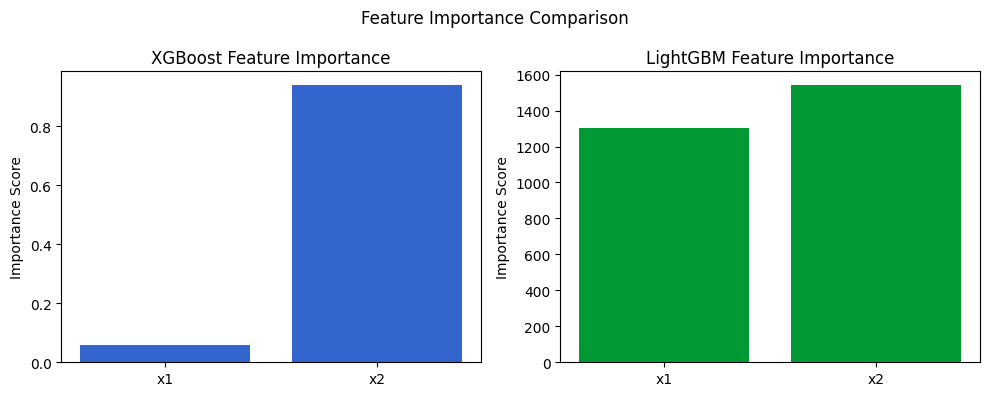

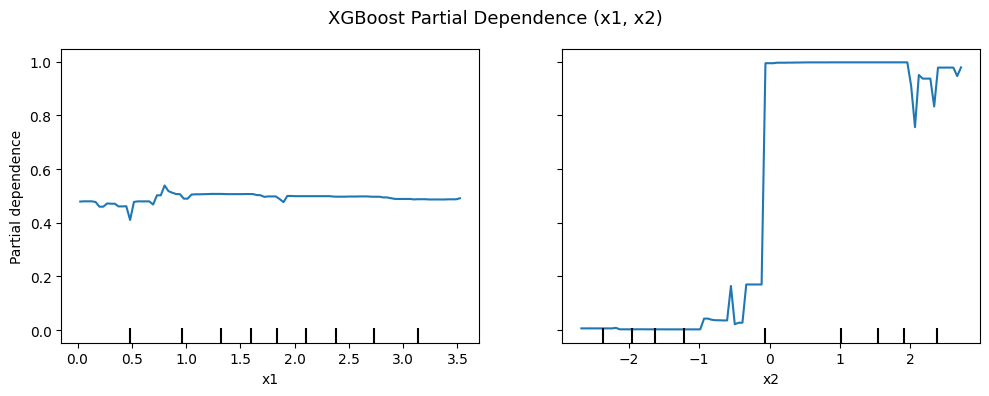

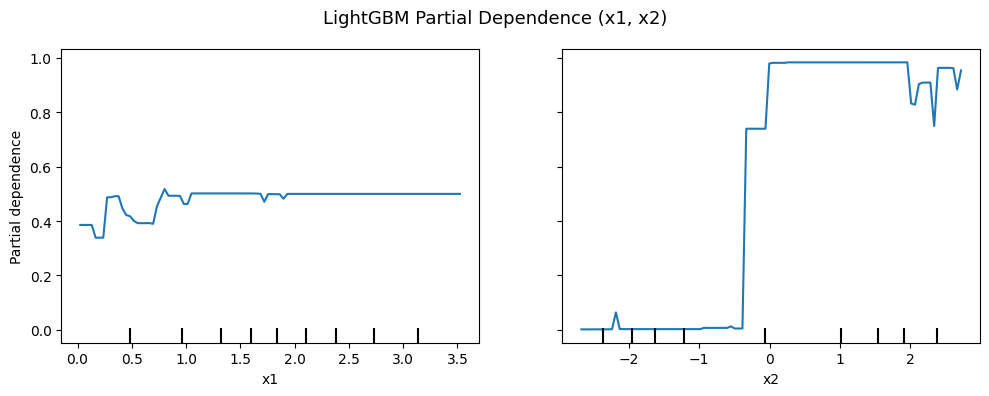

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# ----------------------------------------------------
# Prepare DataFrames with explicit feature names
# ----------------------------------------------------
X_train_df = pd.DataFrame(X_train, columns=["x1", "x2"])
X_test_df  = pd.DataFrame(X_test,  columns=["x1", "x2"])

# Optional: refit on DataFrame for consistent feature names (safe operation)
xgb.fit(X_train_df, y_train)
lgb.fit(X_train_df, y_train)

# ----------------------------------------------------
# Feature Importances
# ----------------------------------------------------
fi_xgb = xgb.feature_importances_
fi_lgb = lgb.feature_importances_

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(["x1", "x2"], fi_xgb, color="#3366cc")
axes[0].set_title("XGBoost Feature Importance")
axes[0].set_ylabel("Importance Score")

axes[1].bar(["x1", "x2"], fi_lgb, color="#009933")
axes[1].set_title("LightGBM Feature Importance")
axes[1].set_ylabel("Importance Score")

plt.suptitle("Feature Importance Comparison")
plt.tight_layout()
plt.show()

# ----------------------------------------------------
# Partial Dependence Plots
# ----------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(
    xgb,
    X_train_df,
    features=["x1", "x2"],
    ax=ax
)
plt.suptitle("XGBoost Partial Dependence (x1, x2)", fontsize=13)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(
    lgb,
    X_train_df,
    features=["x1", "x2"],
    ax=ax
)
plt.suptitle("LightGBM Partial Dependence (x1, x2)", fontsize=13)
plt.tight_layout()
plt.show()

## 8) 🔢 Regression Demo (1D signal with noise)
We compare XGBoost and LightGBM on a noisy nonlinear regression task.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


🚀 XGBoost — RMSE: 0.575, R²: 0.984
🌿 LightGBM — RMSE: 0.577, R²: 0.984


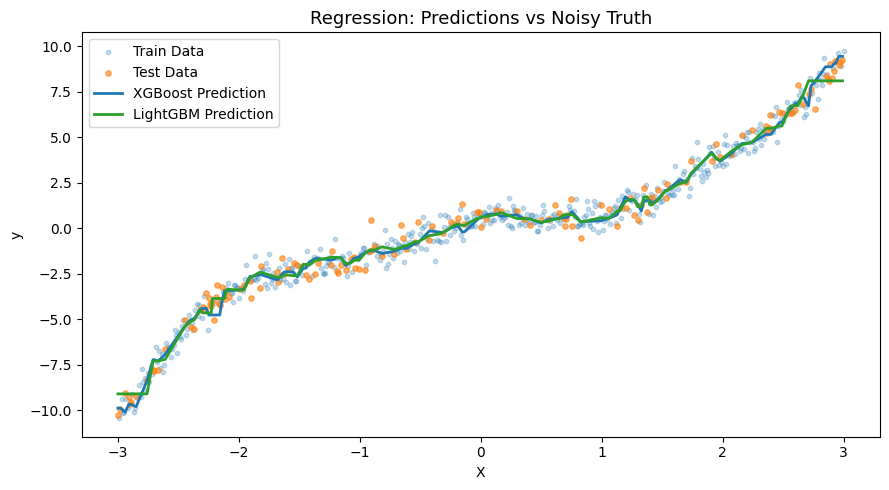

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ----------------------------------------------------
# Synthetic Nonlinear 1D Regression Data
# ----------------------------------------------------
rng = np.random.RandomState(42)
Xr = np.linspace(-3, 3, 600).reshape(-1, 1)
yr_true = np.sinh(Xr).ravel() + 0.5 * np.cos(3 * Xr).ravel()
yr = yr_true + rng.normal(0, 0.5, size=yr_true.shape)

# Randomized split (instead of slicing)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.25, random_state=42
)

# ----------------------------------------------------
# XGBoost Regressor
# ----------------------------------------------------
xgbr = XGBRegressor(
    n_estimators=800,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    n_jobs=-1,
    random_state=42,
)
xgbr.fit(Xr_train, yr_train, eval_set=[(Xr_test, yr_test)], verbose=False)
yrp_xgb = xgbr.predict(Xr_test)

# ----------------------------------------------------
# LightGBM Regressor
# ----------------------------------------------------
lgbr = LGBMRegressor(
    n_estimators=1200,
    learning_rate=0.03,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=-1  # silence warnings
)
lgbr.fit(Xr_train, yr_train, eval_set=[(Xr_test, yr_test)], callbacks=[])
yrp_lgb = lgbr.predict(Xr_test)

# ----------------------------------------------------
# Evaluation Metrics
# ----------------------------------------------------
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_x, r2_x = metrics(yr_test, yrp_xgb)
rmse_l, r2_l = metrics(yr_test, yrp_lgb)

print(f"🚀 XGBoost — RMSE: {rmse_x:.3f}, R²: {r2_x:.3f}")
print(f"🌿 LightGBM — RMSE: {rmse_l:.3f}, R²: {r2_l:.3f}")

# ----------------------------------------------------
# Visualization
# ----------------------------------------------------
# Sort for smoother plotting
sort_idx = np.argsort(Xr_test.ravel())
plt.figure(figsize=(9, 5))
plt.scatter(Xr_train, yr_train, s=10, alpha=0.25, label="Train Data")
plt.scatter(Xr_test, yr_test, s=15, alpha=0.6, label="Test Data")
plt.plot(Xr_test[sort_idx], yrp_xgb[sort_idx], lw=2, label="XGBoost Prediction", color="#1f77b4")
plt.plot(Xr_test[sort_idx], yrp_lgb[sort_idx], lw=2, label="LightGBM Prediction", color="#2ca02c")
plt.title("Regression: Predictions vs Noisy Truth", fontsize=13)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

## 9) 🛑 Early Stopping (both libraries)
Use a validation set and stop when eval metric stops improving. Example (classification):

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import xgboost as xgb

# ----------------------------------------------------
# Synthetic binary classification data
# ----------------------------------------------------
X, y = make_classification(
    n_samples=1200,
    n_features=20,
    n_informative=8,
    n_redundant=4,
    random_state=42
)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ----------------------------------------------------
# ✅ XGBoost with Early Stopping (modern API)
# ----------------------------------------------------
xgb_es = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

# Convert to DMatrix for training (modern 2.x pattern)
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval = xgb.DMatrix(X_val, label=y_val)

evals_result = {}
xgb_model = xgb.train(
    params=xgb_es.get_xgb_params(),
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    evals_result=evals_result,
    verbose_eval=False
)

print(f"🚀 XGBoost best_iteration: {xgb_model.best_iteration}")

# ----------------------------------------------------
# ✅ LightGBM with Early Stopping
# ----------------------------------------------------
lgb_es = LGBMClassifier(
    n_estimators=4000,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=-1
)

lgb_es.fit(
    X_tr,
    y_tr,
    eval_set=[(X_val, y_val)],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(0)  # silence logs
    ]
)

print(f"🌿 LightGBM best_iteration_: {lgb_es.best_iteration_}")

🚀 XGBoost best_iteration: 215
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.246834
🌿 LightGBM best_iteration_: 140


## 10) 🧰 Practical Tips
- Start with **learning_rate=0.05–0.1** and **n_estimators** big enough; rely on **early stopping**.
- Control complexity with **max_depth** (XGB) / **num_leaves** & **max_depth** (LGBM).
- Use **subsample** and **colsample_bytree** for extra regularization.
- For large, sparse datasets: prefer **LightGBM**; for tabular with strong regularization needs: **XGBoost** is robust.
- For calibrated probabilities, consider Platt scaling / isotonic regression after training.